In [1]:
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sb
from PIL import Image

from sklearn import metrics

import cv2
import numpy as np
import os

from glob import glob

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Extracting the compressed dataset.
from zipfile import ZipFile
data_path = 'fer2013.zip'

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')


The data set has been extracted.


In [3]:
path = 'train'
classes = os.listdir(path)
classes


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

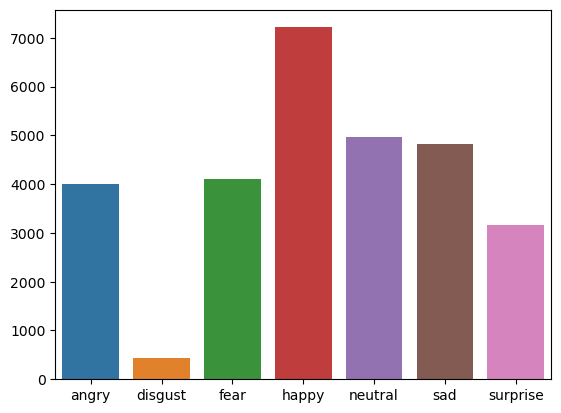

In [4]:
count = []
for cat in classes:
	count.append(len(os.listdir(f'{path}/{cat}')))
sb.barplot(x=classes,y=count)
plt.show()


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
		'train',
		target_size=(48,48),
		batch_size=64,
		color_mode="grayscale",
		class_mode='categorical')

val_gen = val_datagen.flow_from_directory(
		'test',
		target_size=(48,48),
		batch_size=64,
		color_mode="grayscale",
		class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
emotions = list(train_gen.class_indices.keys())


In [7]:
model = keras.models.Sequential([
									layers.Conv2D(32,(3,3),activation='relu',input_shape=(48, 48, 1)),
									layers.Conv2D(64,(3,3),activation='relu'),
									layers.MaxPooling2D(2,2),


									layers.Flatten(),
									layers.Dense(64,activation='relu'),
									layers.BatchNormalization(),
									layers.Dense(32,activation='relu'),
									layers.Dropout(0.3),
									layers.BatchNormalization(),
									layers.Dense(7, activation='softmax')
])


In [8]:
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics=['accuracy']
)


In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
	  if logs.get('val_accuracy') > 0.90:
	    print('\n Validation accuracy has reached upto 90% so, stopping further training.')
	    self.model.stop_training = True

es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.5, verbose=1)


In [15]:
history = model.fit(train_gen, 
                    validation_data = val_gen, 
                    epochs = 50, 
                    verbose = 1, 
                    callbacks = [es, lr, myCallback()])

# Save the trained model to a file
model.save('emotion_model.h5')  # Provide the desired file path for saving the model
print('Model has been saved.')


Epoch 1/50
449/449 [==============================] - 121s 270ms/step - loss: 0.2744 - accuracy: 0.9092 - val_loss: 1.9440 - val_accuracy: 0.5093 - lr: 7.8125e-06
Epoch 2/50
449/449 [==============================] - 119s 264ms/step - loss: 0.2760 - accuracy: 0.9104 - val_loss: 1.9554 - val_accuracy: 0.5107 - lr: 7.8125e-06
Epoch 3/50
449/449 [==============================] - ETA: 0s - loss: 0.2720 - accuracy: 0.9114
Epoch 3: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
449/449 [==============================] - 119s 265ms/step - loss: 0.2720 - accuracy: 0.9114 - val_loss: 1.9649 - val_accuracy: 0.5111 - lr: 7.8125e-06
Epoch 4/50
449/449 [==============================] - 119s 264ms/step - loss: 0.2680 - accuracy: 0.9123 - val_loss: 1.9581 - val_accuracy: 0.5102 - lr: 3.9063e-06
Epoch 5/50
449/449 [==============================] - ETA: 0s - loss: 0.2707 - accuracy: 0.9108
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
449/449 [=====

chatgpt training


In [25]:
# Make changes to the existing code
history = model.fit(train_gen, 
                    validation_data=val_gen, 
                    epochs=50, 
                    verbose=1, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=50), lr, myCallback()])  # Increase patience to 50
model.save('emotion_model.h5')  # Provide the desired file path for saving the model
print('Model has been saved.')


Epoch 1/50
449/449 [==============================] - 259s 575ms/step - loss: 0.2716 - accuracy: 0.9101 - val_loss: 1.9592 - val_accuracy: 0.5111 - lr: 9.7656e-07
Epoch 2/50
449/449 [==============================] - 131s 291ms/step - loss: 0.2701 - accuracy: 0.9117 - val_loss: 1.9667 - val_accuracy: 0.5102 - lr: 9.7656e-07
Epoch 3/50
449/449 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.9115
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.
449/449 [==============================] - 128s 286ms/step - loss: 0.2693 - accuracy: 0.9115 - val_loss: 1.9591 - val_accuracy: 0.5107 - lr: 9.7656e-07
Epoch 4/50
449/449 [==============================] - 128s 286ms/step - loss: 0.2687 - accuracy: 0.9114 - val_loss: 1.9679 - val_accuracy: 0.5111 - lr: 4.8828e-07
Epoch 5/50
449/449 [==============================] - ETA: 0s - loss: 0.2683 - accuracy: 0.9106
Epoch 5: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.
449/449 [=====

In [16]:
def plot_image(img, emoj):
	wmin = 256
	hmin = 256

	emoj = cv2.resize(emoj, (wmin, hmin))
	img = cv2.resize(img, (wmin, hmin))
	cv2.imshow('Images', cv2.hconcat([img, emoj]))


In [17]:
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load the pre-trained model and classes
model = keras.models.load_model('emotion_model.h5')  # Provide the path to your pre-trained model file
classes = emotions  # Assuming 'emotions' variable contains the list of emotion classes

# Assuming 'plot_image' function is already defined
def plot_image(img, emoj):
    wmin = 256
    hmin = 256
    emoj = cv2.resize(emoj, (wmin, hmin))
    img = cv2.resize(img, (wmin, hmin))
    cv2.imshow('Images', cv2.hconcat([img, emoj]))

# Assuming 'train_gen' is your training data generator
for img_path in glob('path_to_your_images_directory/*.jpg'):  # Provide the path to the directory containing your images
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
        gray_face = gray[y:y + h, x:x + w]
        gray_face = cv2.resize(gray_face, (48, 48))
        gray_face = np.expand_dims(gray_face, axis=-1)
        gray_face = np.expand_dims(gray_face, axis=0)

        pred = model.predict(gray_face)
        idx = pred.argmax(axis=-1)[0]

        emoj = cv2.imread(f'emojis/{classes[idx]}.jpg')  # Assuming emoji images are stored in the 'emojis' directory

        plot_image(img, emoj)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cv2.destroyAllWindows()


In [ ]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while(True):
    ret, img = cap.read()
    img = cv2.resize(img, (256, 256))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)

    if len(faces) > 0:
        for (x, y, w, h) in faces:
            try:
                gray_face = cv2.resize(gray[y:y+h, x:x+w], (48, 48))
            except Exception as e:
                print(str(e))
                break

            gray_face = np.expand_dims(gray_face, axis=-1)
            gray_face = np.expand_dims(gray_face, axis=0)

            pred = model.predict(gray_face)
            idx = pred.argmax(axis=-1)[0]

            emoj_path = f'emojis/{emotions[idx]}.jpg'
            emoj = cv2.imread(emoj_path)

            if emoj is not None:
                emoj = cv2.resize(emoj, (256, 256))
                img = cv2.resize(img, (256, 256))
                cv2.imshow('Images', cv2.hconcat([img, emoj]))
            else:
                print(f'Emoji not found for emotion: {emotions[idx]}')

    else:
        emoj = cv2.imread('NofaceDetected.jpeg')
        if emoj is not None:
            emoj = cv2.resize(emoj, (256, 256))
            img = cv2.resize(img, (256, 256))
            cv2.imshow('Images', cv2.hconcat([img, emoj]))
        else:
            print('No face detected and default emoji not found.')

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Code below with new window of capture and exit button

In [ ]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import ttk

# Function to exit the application
def exit_application():
    cap.release()
    cv2.destroyAllWindows()
    root.destroy()

# Initialize tkinter
root = tk.Tk()
root.title("Emoji Detector")

# Create a button to exit the application
exit_button = ttk.Button(root, text="Exit", command=exit_application)
exit_button.pack(pady=10)

# Load face cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Open video capture
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    img = cv2.resize(img, (256, 256))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)

    if len(faces) > 0:
        for (x, y, w, h) in faces:
            try:
                gray_face = cv2.resize(gray[y:y+h, x:x+w], (48, 48))
            except Exception as e:
                print(str(e))
                break

            gray_face = np.expand_dims(gray_face, axis=-1)
            gray_face = np.expand_dims(gray_face, axis=0)

            pred = model.predict(gray_face)
            idx = pred.argmax(axis=-1)[0]

            emoj_path = f'emojis/{emotions[idx]}.jpg'
            emoj = cv2.imread(emoj_path)

            if emoj is not None:
                emoj = cv2.resize(emoj, (256, 256))
                img = cv2.resize(img, (256, 256))
                cv2.imshow('Emoji Detector', cv2.hconcat([img, emoj]))
            else:
                print(f'Emoji not found for emotion: {emotions[idx]}')

    else:
        emoj = cv2.imread('NofaceDetected.jpeg')
        if emoj is not None:
            emoj = cv2.resize(emoj, (256, 256))
            img = cv2.resize(img, (256, 256))
            cv2.imshow('Emoji Detector', cv2.hconcat([img, emoj]))
        else:
            print('No face detected and default emoji not found.')

    # Check for the exit button press in the tkinter window
    root.update()

    # Break the loop if the exit button is pressed in the tkinter window
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the video capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


Code below to save the image If you press "C"

In [26]:
import cv2
import numpy as np
import datetime

# Function to capture and save a screenshot
def capture_screenshot():
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H-%M-%S")
    screenshot_filename = f"screenshot_{timestamp}.png"
    cv2.imwrite(screenshot_filename, cv2.hconcat([img, emoj]))
    print(f'Screenshot saved as {screenshot_filename}')

# Initialize the camera
cap = cv2.VideoCapture(0)

# Load face cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    ret, img = cap.read()
    img = cv2.resize(img, (256, 256))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)

    if len(faces) > 0:
        for (x, y, w, h) in faces:
            try:
                gray_face = cv2.resize(gray[y:y+h, x:x+w], (48, 48))
            except Exception as e:
                print(str(e))
                break

            gray_face = np.expand_dims(gray_face, axis=-1)
            gray_face = np.expand_dims(gray_face, axis=0)

            pred = model.predict(gray_face)
            idx = pred.argmax(axis=-1)[0]

            emoj_path = f'emojis/{emotions[idx]}.jpg'
            emoj = cv2.imread(emoj_path)

            if emoj is not None:
                emoj = cv2.resize(emoj, (256, 256))
                img = cv2.resize(img, (256, 256))
                cv2.imshow('Emoji Detector', cv2.hconcat([img, emoj]))
            else:
                print(f'Emoji not found for emotion: {emotions[idx]}')

    else:
        emoj = cv2.imread('NofaceDetected.jpeg')
        if emoj is not None:
            emoj = cv2.resize(emoj, (256, 256))
            img = cv2.resize(img, (256, 256))
            cv2.imshow('Emoji Detector', cv2.hconcat([img, emoj]))

    # Check for the exit button press
    key = cv2.waitKey(10)

    if key & 0xFF == ord('q'):
        break

    # Check for the capture button press ('C' key)
    if key & 0xFF == ord('c'):
        capture_screenshot()

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 29ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 30ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 32ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 28ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 27ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 28ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 29ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 30ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 30ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 27ms/step
Emoji not found for emotion: surprise
1/1 [==============================] - 0s 34ms/step
Emoji not found for emotion: surprise
1/1 [=====

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix_operations.cpp:67: error: (-215:Assertion failed) src[i].dims <= 2 && src[i].rows == src[0].rows && src[i].type() == src[0].type() in function 'cv::hconcat'


: 